# Method validation

This notebook contains some charts to validate our solid media growth assays
and to compare the two machines (Tecan and SpectraMax) we used.

### To Do

* Compare final time point from space and ground plates measured with the Tecan to the SpectraMax
* Fix ledgend annotation as requested by reviewers

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.DataFrame.from_csv('OD600_tecan.csv')

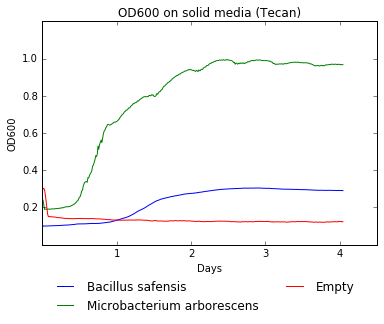

In [51]:
plot( df.index/24, df['Bacillus safensis'], label='Bacillus safensis' )
plot( df.index/24, df['Microbacterium arborescens'], label='Microbacterium arborescens' )
plot( df.index/24, df['Empty'], label='Empty' )
lgd = legend(bbox_to_anchor=(0, -0.35), loc=3, ncol=2, frameon=False )
xticks( [1,2,3,4] )
xlabel('Days')

yticks( [0.2, 0.4, 0.6, 0.8, 1.0] )
ylim(0,1.2)
ylabel('OD600')

title('OD600 on solid media (Tecan)')

savefig('OD600_tecan.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
savefig('OD600_tecan.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

### Load raw Tecan data

In [146]:
ground1 = pd.read_csv( 'Tecan_final_ground1.csv', index_col='Well' )
ground2 = pd.read_csv( 'Tecan_final_ground2.csv', index_col='Well' )
ground3 = pd.read_csv( 'Tecan_final_ground3.csv', index_col='Well' )

space1 = pd.read_csv( 'Tecan_final_space1.csv', index_col='Well' )
space2 = pd.read_csv( 'Tecan_final_space2.csv', index_col='Well' )
space3 = pd.read_csv( 'Tecan_final_space3.csv', index_col='Well' )

ground1.head()

,Mean,StDev,0;4,1;4,2;4,3;4,4;4,4;3,3;3,2;3,...,4;1,3;1,2;1,1;1,0;1,0;0,1;0,2;0,3;0,4;0
Well,,,,,,,,,,,,,,,,,,,,,
A1,1.5923,0.2050,1.9462,1.5086,1.3635,1.7770,2.0879,1.8976,1.5720,1.3272,...,1.7044,1.5863,1.5002,1.4501,1.4144,1.5829,1.5756,1.6598,1.7400,1.8731
B1,1.2496,0.0785,1.2712,1.1910,1.1972,1.2602,1.4202,1.4384,1.2224,1.1723,...,1.3133,1.1755,1.1613,1.2269,1.2256,1.1993,1.2008,1.2762,1.3104,1.3939
C1,0.6786,0.1397,0.8472,0.5821,0.6244,0.6246,1.2159,0.7972,0.6695,0.6303,...,0.6813,0.6305,0.7277,0.5338,0.7042,0.7045,0.5924,0.6613,0.5806,0.8022
D1,0.9129,0.1830,0.9031,0.7713,0.8111,1.2671,1.4635,1.0388,0.9496,1.0637,...,1.0094,0.9125,0.7545,0.8939,0.7649,0.7821,0.7770,0.7694,0.7777,0.9237
E1,0.5517,0.5478,0.7842,0.1418,0.3141,0.1562,1.4383,0.1821,0.1309,0.1265,...,0.2833,0.1218,0.1193,1.1971,1.8430,1.6082,1.4881,0.3971,0.6015,0.8176


### Load the plate maps

In [147]:

rows = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H' ]
cols = [ '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12' ]

ground1_map = pd.read_csv( 'platemap_ground1.csv', index_col=False, header=None, names=cols )
ground2_map = pd.read_csv( 'platemap_ground2.csv', index_col=False, header=None, names=cols )
ground3_map = pd.read_csv( 'platemap_ground3.csv', index_col=False, header=None, names=cols )

space1_map = pd.read_csv( 'platemap_space1.csv', index_col=False, header=None, names=cols )
space2_map = pd.read_csv( 'platemap_space2.csv', index_col=False, header=None, names=cols )
space3_map = pd.read_csv( 'platemap_space3.csv', index_col=False, header=None, names=cols )

ground1_map.index = rows
ground2_map.index = rows
ground3_map.index = rows

space1_map.index = rows
space2_map.index = rows
space3_map.index = rows

ground1_map

,1,2,3,4,5,6,7,8,9,10,11,12
A,1,2,3,4,5,6,25,26,27,28,29,30
B,13,14,15,16,17,18,37,38,39,40,41,42
C,7,8,9,10,11,12,31,32,33,34,35,36
D,19,20,21,22,23,24,43,44,45,46,47,48
E,1,2,3,4,5,6,7,8,9,10,11,12
F,13,14,15,16,17,18,19,20,21,22,23,24
G,25,26,27,28,29,30,31,32,33,34,35,36
H,37,38,39,40,41,42,43,44,45,46,47,48


### Map team number to well name

In [148]:
def flatten_platemap( platemap ) :
    rows = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H' ]
    cols = [ '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12' ]
    flatmap = {}
    for row in rows :
        for col in cols :
            flatmap[row+col] = ground1_map[col][row]
    return flatmap

ground1 = ground1.join( pd.DataFrame( { 'team' : flatten_platemap(ground1_map) } ) )
ground2 = ground2.join( pd.DataFrame( { 'team' : flatten_platemap(ground2_map) } ) )
ground3 = ground3.join( pd.DataFrame( { 'team' : flatten_platemap(ground3_map) } ) )

space1 = space1.join( pd.DataFrame( { 'team' : flatten_platemap(space1_map) } ) )
space2 = space2.join( pd.DataFrame( { 'team' : flatten_platemap(space2_map) } ) )
space3 = space3.join( pd.DataFrame( { 'team' : flatten_platemap(space3_map) } ) )

ground1.head()

,Mean,StDev,0;4,1;4,2;4,3;4,4;4,4;3,3;3,2;3,...,3;1,2;1,1;1,0;1,0;0,1;0,2;0,3;0,4;0,team
Well,,,,,,,,,,,,,,,,,,,,,
A1,1.5923,0.2050,1.9462,1.5086,1.3635,1.7770,2.0879,1.8976,1.5720,1.3272,...,1.5863,1.5002,1.4501,1.4144,1.5829,1.5756,1.6598,1.7400,1.8731,1
B1,1.2496,0.0785,1.2712,1.1910,1.1972,1.2602,1.4202,1.4384,1.2224,1.1723,...,1.1755,1.1613,1.2269,1.2256,1.1993,1.2008,1.2762,1.3104,1.3939,13
C1,0.6786,0.1397,0.8472,0.5821,0.6244,0.6246,1.2159,0.7972,0.6695,0.6303,...,0.6305,0.7277,0.5338,0.7042,0.7045,0.5924,0.6613,0.5806,0.8022,7
D1,0.9129,0.1830,0.9031,0.7713,0.8111,1.2671,1.4635,1.0388,0.9496,1.0637,...,0.9125,0.7545,0.8939,0.7649,0.7821,0.7770,0.7694,0.7777,0.9237,19
E1,0.5517,0.5478,0.7842,0.1418,0.3141,0.1562,1.4383,0.1821,0.1309,0.1265,...,0.1218,0.1193,1.1971,1.8430,1.6082,1.4881,0.3971,0.6015,0.8176,1


### Map team number to team name

In [149]:
teams = pd.read_csv( 'spacebugs.tsv', sep='\t', names=['team','source','species','short name'] )

ground1 = ground1.merge( teams, on='team' )
ground2 = ground2.merge( teams, on='team' )
ground3 = ground3.merge( teams, on='team' )

space1 = space1.merge( teams, on='team' )
space2 = space2.merge( teams, on='team' )
space3 = space3.merge( teams, on='team' )

groundmeans = ground1[ ['Mean', 'short name'] ]
groundmeans = groundmeans.append( ground2[ ['Mean', 'short name'] ] )
groundmeans = groundmeans.append( ground3[ ['Mean', 'short name'] ] )

spacemeans = space1[ ['Mean', 'short name'] ]
spacemeans = spacemeans.append( space2[ ['Mean', 'short name'] ] )
spacemeans = spacemeans.append( space3[ ['Mean', 'short name'] ] )

### Combine team averages

In [150]:
ground = {}
for name in set(groundmeans['short name']) :
    ground[name] = mean(groundmeans[ groundmeans['short name'] == name ]['Mean'])
    
space = {}
for name in set(spacemeans['short name']) :
    space[name] = mean(spacemeans[ spacemeans['short name'] == name ]['Mean'])

data = pd.DataFrame( { 'tecan_ground' : ground, 'tecan_space' : space } )

### Join SpectraMax and Tecan averages

In [152]:
df_sptmx = pd.read_csv( 'Space_vs_Ground.tsv', sep='\t', index_col=False ).set_index('n')
data = df_sptmx.join( data, on='short name' )
data.head()

,short name,long name,space 96h OD,space 96h OD std,ground 96h OD,ground 96h OD std,alive,tecan_ground,tecan_space
n,,,,,,,,,
1,OB179,1975 Viking Mars Orbiter,1.689637,0.097210,1.381485,0.417282,True,1.437817,1.552533
2,MER TA 8-2,Mars Exploration Rover (JPL),1.439737,0.138228,1.463374,0.409781,True,1.120867,1.317533
3,MER TA 21,Mars Exploration Rover (JPL),0.971819,0.314732,1.491609,0.234723,True,1.098550,0.986367
4,273.1.3,Mars Exploration Rover (JPL),1.601785,0.094799,1.848448,0.205193,True,1.579633,1.431500
5,MER TA 108,Mars Exploration Rover (JPL),1.685011,0.076658,1.232715,0.280418,True,1.182017,1.214967


### Correlations between machines

For the space-based observations and the ground-based observations, 
how well does the data from the two machines correlate?

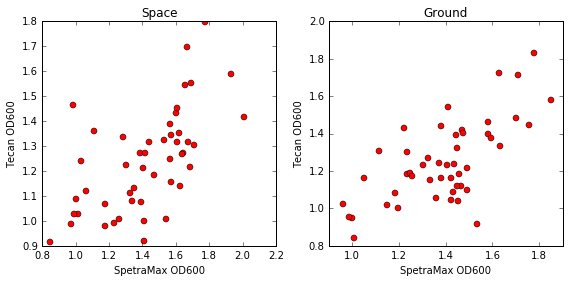

In [153]:
figure(figsize=(8, 4))

subplot(1,2,1)
plot( data['space 96h OD'], data['tecan_space'], 'ro' )
title('Space')
xlabel('SpetraMax OD600')
ylabel('Tecan OD600')
subplot(1,2,2)
plot( data['ground 96h OD'], data['tecan_ground'], 'ro' )
title('Ground')
xlabel('SpetraMax OD600')
ylabel('Tecan OD600')
tight_layout()

In [154]:
from scipy.stats import pearsonr

# Pearson's correlation of Tecan and SpectraMax data for space

pcc, p = pearsonr( data['space 96h OD'], data['tecan_space'] )
print 'PCC :', pcc
print 'p value :', p

PCC : 0.61063587637
p value : 4.0497749332e-06


In [159]:
# Pearson's correlation of Tecan and SpectraMax data for ground

pcc, p = pearsonr( data['ground 96h OD'], data['tecan_ground'] )
print 'PCC :', pcc
print 'p value :', p

PCC : 0.676698992777
p value : 1.29149414044e-07


### Correlations between experiments

For the two machines used, how well do the space-based observations and the 
ground-based observations correlate?

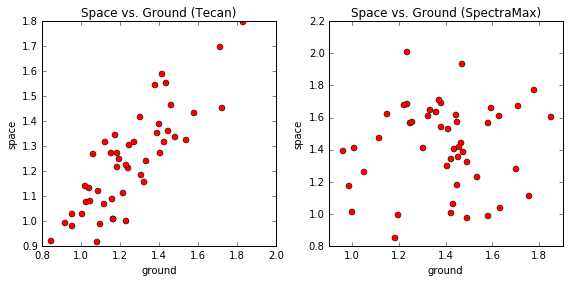

In [160]:
figure(figsize=(8, 4))
subplot(1,2,1)
plot( data['tecan_ground'], data['tecan_space'], 'ro' )
title( 'Space vs. Ground (Tecan)' )
xlabel('ground')
ylabel('space')
subplot(1,2,2)
plot( data['ground 96h OD'], data['space 96h OD'], 'ro' )
title( 'Space vs. Ground (SpectraMax)' )
xlabel('ground')
ylabel('space')
tight_layout()

In [157]:
# Pearson's correlation of ground and space data for Tecan data

pcc, p = pearsonr( data['tecan_ground'], data['tecan_space'] )

print 'PCC :', pcc
print 'p value :', p

PCC : 0.836065128736
p value : 1.40932674821e-13


In [161]:
# Pearson's correlation of ground and space data for SpectraMax data

pcc, p = pearsonr( data['ground 96h OD'], data['space 96h OD'] )

print 'PCC :', pcc
print 'p value :', p

PCC : 0.0824590978219
p value : 0.577401325257
